# GPU setup

In [1]:
!nvidia-smi

Tue Sep  3 11:52:52 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:3D:00.0 Off |                    0 |
| N/A   40C    P0    46W / 300W |      3MiB / 16384MiB |      0%   E. Process |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:3E:00.0 Off |                    0 |
| N/A   

In [1]:
import torch

print(torch.cuda.is_available())
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
    print(f"Memory Allocated: {torch.cuda.memory_allocated(0)} bytes")
    print(f"Memory Cached: {torch.cuda.memory_reserved(0)} bytes")

True
NVIDIA H100 MIG 3g.47gb
Memory Allocated: 0 bytes
Memory Cached: 0 bytes


In [2]:
import difflib
from IPython.display import display, HTML

def highlight_diff(sentence1, sentence2):
    diff = difflib.ndiff(sentence1, sentence2)
    highlighted = []
    
    for char in diff:
        if char.startswith('-'):
            highlighted.append(f"<span style='color:red'>{char[2:]}</span>")
        elif char.startswith('+'):
            highlighted.append(f"<span style='color:green'>{char[2:]}</span>")
        else:
            highlighted.append(char[2:])
    
    return ''.join(highlighted)

# BART-SWiPE large

https://huggingface.co/Salesforce/bart-large-swipe

In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Salesforce/bart-large-swipe")
model = AutoModelForSeq2SeqLM.from_pretrained("Salesforce/bart-large-swipe")

## Settings

### Tokenizer

In [4]:
# settings
print("Tokenizer vocab size:", tokenizer.vocab_size)
print("Tokenizer special tokens:", tokenizer.all_special_tokens)
print("Max model input length:", tokenizer.model_max_length)
print("Pad token:", tokenizer.pad_token)
print("BOS token:", tokenizer.bos_token)
print("EOS token:", tokenizer.eos_token, end='\n\n')

# configuration
print("Tokenizer configuration:")
print(tokenizer)

Tokenizer vocab size: 50265
Tokenizer special tokens: ['<s>', '</s>', '<unk>', '<pad>', '<mask>']
Max model input length: 1024
Pad token: <pad>
BOS token: <s>
EOS token: </s>

Tokenizer configuration:
BartTokenizerFast(name_or_path='Salesforce/bart-large-swipe', vocab_size=50265, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=Tr

In [10]:
print(tokenizer.special_tokens_map)

{'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}


In [7]:
print("Tokenizer truncation:", tokenizer.truncation_side)
print("Tokenizer padding:", tokenizer.padding_side)
print("Model max length:", tokenizer.model_max_length)

Tokenizer truncation: right
Tokenizer padding: right
Model max length: 1024


In [11]:
print("Added tokens:", tokenizer.added_tokens_decoder)

Added tokens: {0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True)}


In [8]:
tokenizer.init_kwargs

{'errors': 'replace',
 'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 'cls_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
 'add_prefix_space': False,
 'trim_offsets': True,
 'clean_up_tokenization_spaces': True,
 'model_max_length': 1024,
 'name_or_path': 'Salesforce/bart-large-swipe'}

### Generation config

In [8]:
model.generation_config

GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 2,
  "early_stopping": true,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "no_repeat_ngram_size": 3,
  "num_beams": 4,
  "pad_token_id": 1
}

### Config

In [4]:
print(model.config)

BartConfig {
  "_name_or_path": "Salesforce/bart-large-swipe",
  "activation_dropout": 0.1,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 0,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "max_position

In [7]:
print(model.config.decoder_start_token_id )
print(model.config.bos_token_id )
print(model.config.eos_token_id)
print(model.config.pad_token_id ) 
print(model.config.forced_bos_token_id )
print(model.config.forced_eos_token_id)

2
0
2
1
0
2


In [5]:
complex_s = """The micrometre (International spelling as used by the International Bureau of Weights and Measures; SI
symbol: μm) or micrometer (American spelling), also commonly known as a micron, is an SI derived
unit of length equaling 1x10-6 of a metre (SI standard prefix “micro-” = 10-6); that is, one millionth of
a metre (or one thousandth of a millimetre, 0.001 mm, or about 0.000039 inch). The micrometre is a
common unit of measurement for wavelengths of infrared radiation as well as sizes of biological cells and
bacteria, and for grading wool by the diameter of the fibres. The width of a single human hair ranges from
approximately 10 to 200 μm. The first and longest human chromosome is approximately 10μm in length."""

In [42]:
INSTRUCTION = "simplify: "
inputs = tokenizer(INSTRUCTION + complex_s, return_tensors="pt", truncation=True)
print(inputs)

{'input_ids': tensor([[    0, 13092,  2911,  4591,    35,    20, 14926,  5638,   594,   241,
            36, 29743, 24684,    25,   341,    30,     5,  1016,  4750,     9,
           166,  6183,     8, 34131,   131, 17982, 50118,  8628, 43891,    35,
         46911,   119,    43,    50, 14926,  5638,  5906,    36,  4310, 24684,
           238,    67, 10266,   684,    25,    10, 14926,  2839,     6,    16,
            41, 17982, 16934, 50118, 19304,     9,  5933,  4065,  8279,   112,
          1178,   698,    12,   401,     9,    10, 24697,    36,  6850,  2526,
         46622,    44,    48, 35228,    12,    17,    46,  5457,   158,    12,
           401,  4397,    14,    16,     6,    65,   153,   212,     9, 50118,
           102, 24697,    36,   368,    65,  7673,   212,     9,    10,  7259,
         12965,   241,     6,   321,     4, 19089, 15408,     6,    50,    59,
           321,     4, 14200,  3416, 10468,   322,    20, 14926,  5638,   594,
           241,    16,    10, 50118, 2

In [43]:
output_ids = model.generate(**inputs, max_length=200, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
print(output_ids)

tensor([[    2,     0,   133, 14926,  5638,   594,   241,    36, 29743, 24684,
            25,   341,    30,     5,  1016,  4750,     9,   166,  6183,     8,
         34131,   131, 17982, 50118,  8628, 43891,    35, 46911,   119,    43,
            50, 14926,  5638,  5906,    36,  4310, 24684,   238,    67, 10266,
           684,    25,    10, 14926,  2839,     6,    16,    41, 17982, 16934,
          1933,     9,  5933,  4065,  8279,   112,  1178,   698,    12,   401,
             9,    10, 24697,    36,  6850,  2526, 46622,    44,    48, 35228,
            12,    17,    46,  5457,   158,    12,   401,  4397,    14,    16,
             6,    65,   153,   212,     9, 50118,   102, 24697,    36,   368,
            65,  7673,   212,     9,    10,  7259, 12965,   241,     6,   321,
             4, 19089, 15408,     6,    50,    59,   321,     4, 14200,  3416,
         10468,   322,     2]])


In [44]:
simplified_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(simplified_text)

The micrometre (International spelling as used by the International Bureau of Weights and Measures; SI
symbol: μm) or micrometer (American spelling), also commonly known as a micron, is an SI derived unit of length equaling 1x10-6 of a metre (SI standard prefix “micro-” = 10-6); that is, one millionth of
a metre (or one thousandth of a millimetre, 0.001 mm, or about 0.000039 inch).


In [45]:
display(HTML(highlight_diff(complex_s, simplified_text)))

# BART-SWiPE large clean

In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer_c = AutoTokenizer.from_pretrained("Salesforce/bart-large-swipe-clean")
model_c = AutoModelForSeq2SeqLM.from_pretrained("Salesforce/bart-large-swipe-clean")

In [2]:
model_c.config.dropout

0.1

In [2]:
model_c.generation_config

GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 2,
  "early_stopping": true,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "no_repeat_ngram_size": 3,
  "num_beams": 4,
  "pad_token_id": 1
}

In [29]:
#INSTRUCTION = "simplify: "
inputs_c = tokenizer_c(complex_s, return_tensors="pt", truncation=True)
print(inputs_c)

{'input_ids': tensor([[    0,   133, 14926,  5638,   594,   241,    36, 29743, 24684,    25,
           341,    30,     5,  1016,  4750,     9,   166,  6183,     8, 34131,
           131, 17982, 50118,  8628, 43891,    35, 46911,   119,    43,    50,
         14926,  5638,  5906,    36,  4310, 24684,   238,    67, 10266,   684,
            25,    10, 14926,  2839,     6,    16,    41, 17982, 16934, 50118,
         19304,     9,  5933,  4065,  8279,   112,  1178,   698,    12,   401,
             9,    10, 24697,    36,  6850,  2526, 46622,    44,    48, 35228,
            12,    17,    46,  5457,   158,    12,   401,  4397,    14,    16,
             6,    65,   153,   212,     9, 50118,   102, 24697,    36,   368,
            65,  7673,   212,     9,    10,  7259, 12965,   241,     6,   321,
             4, 19089, 15408,     6,    50,    59,   321,     4, 14200,  3416,
         10468,   322,    20, 14926,  5638,   594,   241,    16,    10, 50118,
         27278,  1933,     9, 20104,  

In [30]:
output_ids_c = model_c.generate(**inputs_c, max_length=200, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
print(output_ids_c)

tensor([[    2,     0,   133, 14926,  5638,   594,   241,  1640, 29743, 24684,
            25,   341,    30,     5,  1016,  4750,     9,   166,  6183,     8,
         34131,   131, 17982,  8628, 43891,    35, 46911,   119,    43,    50,
         14926,  5638,  5906,  1640,  4310, 24684,   238,    67, 10266,   684,
            25,    10, 14926,  2839,     6,    16,    41, 17982,  1933,     9,
          5933,  4065,  8279,   112,  1178,   698,    12,   401,     9,    10,
         24697,  1640,  6850,  2526, 46622,    44,    48, 35228,    12,    17,
            46,  5457,   158,    12,   401,  4397,    14,    16,     6,    65,
           153,   212,     9,   102, 24697,  1640,   368,    65,  7673,   212,
             9,    10,  7259, 12965,   241,     6,   321,     4, 19089, 50141,
          5471,     6,    50,    59,   321,     4, 14200,  3416, 50141,  3796,
           322,    20,    78,     8,  6463,  1050, 44198,    16,  2219,   158,
         47049,   119,    11,  5933,     4,     2]])

In [31]:
simplified_text_c = tokenizer_c.decode(output_ids_c[0], skip_special_tokens=True)
print(simplified_text_c)

The micrometre(International spelling as used by the International Bureau of Weights and Measures; SIsymbol: μm) or micrometer(American spelling), also commonly known as a micron, is an SI unit of length equaling 1x10-6 of a metre(SI standard prefix “micro-” = 10-6); that is, one millionth ofa metre(or one thousandth of a millimetre, 0.001 mm, or about 0.000039 inch). The first and longest human chromosome is approximately 10μm in length.


In [32]:
complex_s

'The micrometre (International spelling as used by the International Bureau of Weights and Measures; SI\nsymbol: μm) or micrometer (American spelling), also commonly known as a micron, is an SI derived\nunit of length equaling 1x10-6 of a metre (SI standard prefix “micro-” = 10-6); that is, one millionth of\na metre (or one thousandth of a millimetre, 0.001 mm, or about 0.000039 inch). The micrometre is a\ncommon unit of measurement for wavelengths of infrared radiation as well as sizes of biological cells and\nbacteria, and for grading wool by the diameter of the fibres. The width of a single human hair ranges from\napproximately 10 to 200 μm. The first and longest human chromosome is approximately 10μm in length.'

In [41]:
display(HTML(highlight_diff(complex_s, simplified_text_c)))

In [53]:
print(model_c.config)

BartConfig {
  "_name_or_path": "Salesforce/bart-large-swipe-clean",
  "activation_dropout": 0.1,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 0,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "max_po

# SWiPE tests datasets

https://github.com/Salesforce/simplification

In [5]:
from datasets import load_from_disk
import pandas as pd

# load-in a cleaned dataset
swipe_dataset = load_from_disk("../data/swipe_clean")

# Generation and Evaluation

Beam search = 4

>We run experiments on the validation set of
SWIPE. For each model, we report the n-grambased
SARI score (Xu et al., 2016), the Flesch-
Kincaid Grade Level (Kincaid et al., 1975), and
the distribution of edit categories identified by BIC
(merged into 10 groups).

In [6]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_l

In [7]:
from tqdm.notebook import tqdm

predictions = []

for sentence in tqdm(swipe_dataset['test_id'], total=len(swipe_dataset['test_id'])): 
    inputs = tokenizer(sentence['r_content'], return_tensors="pt", truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    output_ids = model.generate(**inputs, min_length = 50, max_length = 512, length_penalty = 1.0)
    simplified_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    predictions.append(simplified_text)

  0%|          | 0/483 [00:00<?, ?it/s]

In [8]:
df_results = pd.DataFrame({
    'text': swipe_dataset['test_id']['r_content'],
    'reference': swipe_dataset['test_id']['s_content'],
    'prediction': predictions
})

df_results.to_csv("../data/predictions_bart-large.csv", index=False)
df_results.head()

,text,reference,prediction
0,The term jargon may have the following meaning...,Jargon is a special way to use words that are ...,The term jargon may have the following meaning...
1,"Russian (Russkij yazyk, Русский язык) is the m...",Russian (русский язык (russkij yazyk)) is the ...,"Russian (Russkij yazyk, Русский язык) is the m..."
2,"Great Britain, also called Britain, is an isla...",Great Britain is the main part of the United K...,"Great Britain, also called Britain, is an isla..."
3,"Transport, or transportation (as it is called ...",Transport is the movement of people and things...,"Transport, or transportation (as it is called ..."
4,Stockholm (help·info) (IPA: ['stɔkhɔlm]; UN/LO...,Stockholm is the capital of Sweden. It is loca...,Stockholm is the capital city of Sweden. It is...


# SARI score

In [9]:
df = pd.read_csv("../data/predictions_bart-large.csv")

In [10]:
df.head()

,text,reference,prediction
0,The term jargon may have the following meaning...,Jargon is a special way to use words that are ...,The term jargon may have the following meaning...
1,"Russian (Russkij yazyk, Русский язык) is the m...",Russian (русский язык (russkij yazyk)) is the ...,"Russian (Russkij yazyk, Русский язык) is the m..."
2,"Great Britain, also called Britain, is an isla...",Great Britain is the main part of the United K...,"Great Britain, also called Britain, is an isla..."
3,"Transport, or transportation (as it is called ...",Transport is the movement of people and things...,"Transport, or transportation (as it is called ..."
4,Stockholm (help·info) (IPA: ['stɔkhɔlm]; UN/LO...,Stockholm is the capital of Sweden. It is loca...,Stockholm is the capital city of Sweden. It is...


## Hugging Face - SARI

In [11]:
from datasets import load_metric
import pandas as pd

sari_metric = load_metric("sari")
sari_scores = []

for index, row in tqdm(df_results.iterrows(), total=len(df_results)):
    r_content = row['text'] 
    s_content = row['reference']  
    prediction = row['prediction']  
    
    sari_score = sari_metric.compute(
        sources=[r_content],
        predictions=[prediction],
        references=[[s_content]] 
    )
    
    sari_scores.append(sari_score['sari'])

/tmp/1070278.1.all.q/ipykernel_3023486/1243258573.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  sari_metric = load_metric("sari")


  0%|          | 0/483 [00:00<?, ?it/s]

In [12]:
df['sari_score'] = sari_scores
df.to_csv("../data/bart-large_sari.csv", index=False)

### Bart-large

SARI score in paper: 47

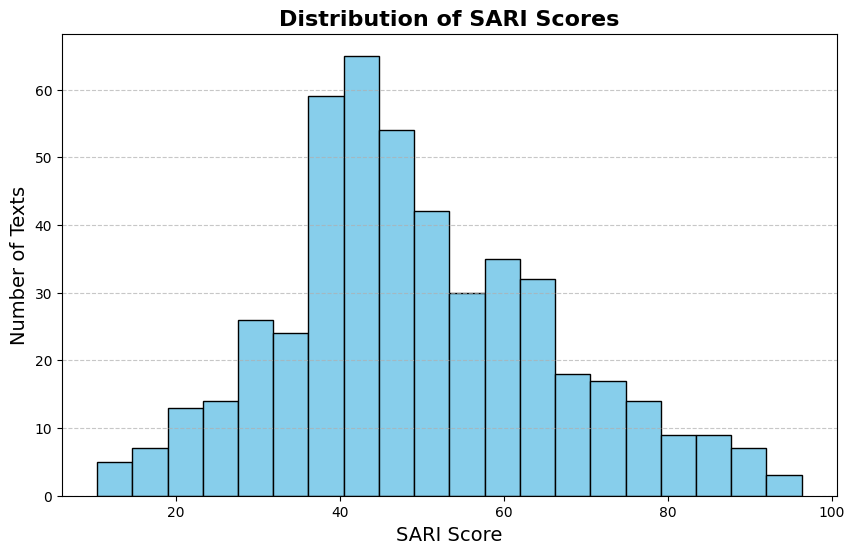

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(sari_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of SARI Scores', fontsize=16, fontweight='bold')
plt.xlabel('SARI Score', fontsize=14)
plt.ylabel('Number of Texts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
import numpy as np

print("Overall SARI score: ", np.mean(sari_scores))

Overall SARI score:  49.48096249295494


### Bart-large-clean

Max_length = 200
>Overall SARI score:  46.886738546261476

Max length = 512
> Overall SARI score:  **46.90068757640026**

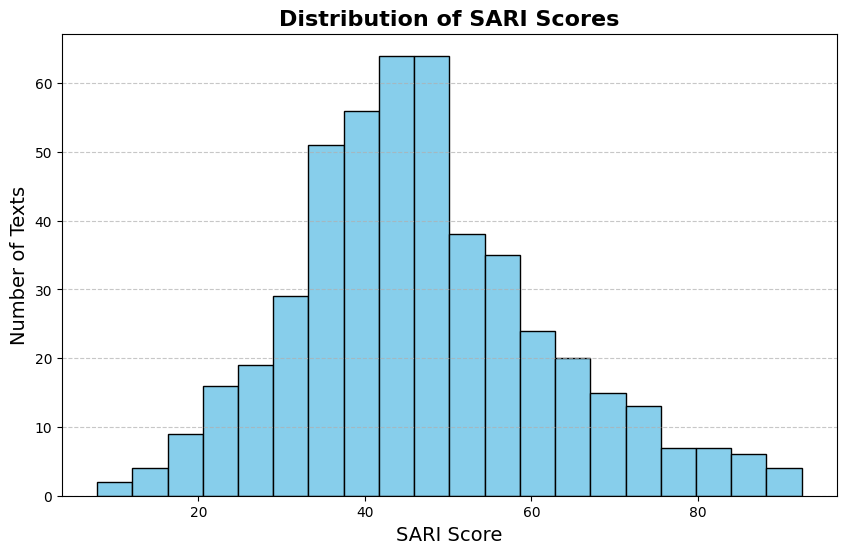

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(sari_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of SARI Scores', fontsize=16, fontweight='bold')
plt.xlabel('SARI Score', fontsize=14)
plt.ylabel('Number of Texts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
import numpy as np

print("Overall SARI score: ", np.mean(sari_scores))

Overall SARI score:  46.90068757640026


## EASSE package SARI

In [25]:
df_sari = pd.read_csv("../data/bart-large_sari-clean.csv")

In [15]:
from easse.sari import corpus_sari

sari_scores_easse = []

for index, row in tqdm(df_results.iterrows(), total=len(df_results)):
    r_content = row['text'] 
    s_content = row['reference']  
    prediction = row['prediction']  
    
    sari_score = corpus_sari(
        orig_sents=[r_content],
        sys_sents=[prediction],
        refs_sents=[[s_content]] 
    )
    
    sari_scores_easse.append(sari_score)

  0%|          | 0/483 [00:00<?, ?it/s]

In [16]:
df['sari_score_easse'] = sari_scores_easse
df.to_csv("../data/bart-large_sari_easse.csv", index=False)

In [26]:
from easse.sari import get_corpus_sari_operation_scores

add_scores = []
keep_scores = []
del_scores = []

for index, row in tqdm(df_sari.iterrows(), total=len(df_results)):
    r_content = row['text'] 
    s_content = row['reference']  
    prediction = row['prediction']  
    
    add_score, keep_score, del_score = get_corpus_sari_operation_scores(
        orig_sents=[r_content],
        sys_sents=[prediction],
        refs_sents=[[s_content]] 
    )
    
    add_scores.append(add_score)
    keep_scores.append(keep_score)
    del_scores.append(del_score)

  0%|          | 0/483 [00:00<?, ?it/s]

### Bart-large

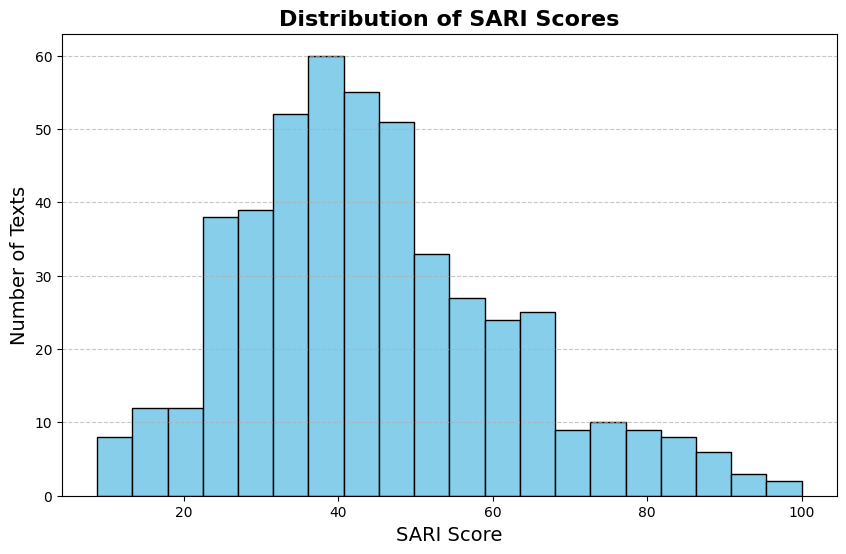

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(sari_scores_easse, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of SARI Scores', fontsize=16, fontweight='bold')
plt.xlabel('SARI Score', fontsize=14)
plt.ylabel('Number of Texts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
import numpy as np

print("Overall SARI easse score: ", np.mean(sari_scores_easse))

Overall SARI easse score:  44.74640578745792


In [24]:
print(f"Addition score: {np.mean(add_scores)}")
print(f"Keep score: {np.mean(keep_scores)}")
print(f"Deletion score: {np.mean(del_scores)}")

Addition score: 14.409176171522335
Keep score: 59.1495754866222
Deletion score: 60.68046570422921


### Bart-large-clean

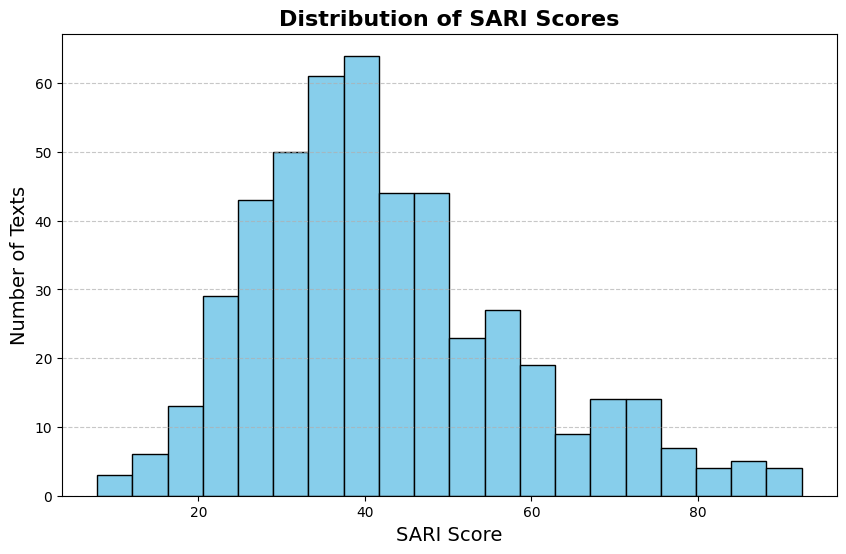

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(sari_scores_easse, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of SARI Scores', fontsize=16, fontweight='bold')
plt.xlabel('SARI Score', fontsize=14)
plt.ylabel('Number of Texts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
import numpy as np

print("Overall SARI easse score: ", np.mean(sari_scores_easse))

Overall SARI easse score:  42.64155877641521


In [27]:
print(f"Addition score: {np.mean(add_scores)}")
print(f"Keep score: {np.mean(keep_scores)}")
print(f"Deletion score: {np.mean(del_scores)}")

Addition score: 11.98018165267816
Keep score: 57.88663553272743
Deletion score: 58.057859143840055


# FKGL score

In [30]:
import sys,os
sys.path.append('../easse')

## Bart-large

In [20]:
from easse.fkgl import corpus_fkgl

bart_c_fkgl_score = corpus_fkgl(df['prediction'])
ref_fkgl_score = corpus_fkgl(df['reference'].tolist())
print(f"FKGL Scores:")
print(f"BART-swipe: {bart_c_fkgl_score:.4f}")
print(f"References: {ref_fkgl_score:.4f}")

FKGL Scores:
BART-swipe: 7.2542
References: 6.4284


## Bart-large-clean

In [36]:
from easse.fkgl import corpus_fkgl

bart_c_fkgl_score = corpus_fkgl(df['prediction'])
ref_fkgl_score = corpus_fkgl(df['reference'].tolist())
print(f"FKGL Scores:")
print(f"BART-swipe-clean: {bart_c_fkgl_score:.4f}")
print(f"References: {ref_fkgl_score:.4f}")

FKGL Scores:
BART-swipe-clean: 6.8963
References: 6.4284


# LlaMA 3

https://huggingface.co/meta-llama

LlaMA 3 8B -> needs agreement

In [1]:
# load model
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B-Instruct")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3-8B-Instruct")

/home/6/ud03926/nlp/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3-8B-Instruct.
401 Client Error. (Request ID: Root=1-669f4b46-6dd7c18439b4cbdc443f9c16;dac52d38-dcbd-492f-96ac-fc3ecfd83c5f)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3-8B-Instruct/resolve/main/config.json.
Access to model meta-llama/Meta-Llama-3-8B-Instruct is restricted. You must be authenticated to access it.